In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [63]:
df = pd.read_csv("train_bench.tsv", sep="\t")
df

,EntryID,OrganismName,Kingdom,SequenceLength,HelixDomain,Class,SPStart,SPEnd,Set,Sequence
0,P32266,Saccharomyces cerevisiae (strain ATCC 204508 /...,Fungi,881,False,Negative,NaN,NaN,Benchmark,MNASPVRLLILRRQLATHPAILYSSPYIKSPLVHLHSRMSNVHRSA...
1,Q8N1N2,Homo sapiens,Metazoa,210,False,Negative,NaN,NaN,Benchmark,MVADIKGNEQIEKYSWREACDTGSSRMDRKHGKYILNVEHSENQPP...
2,Q94JY0,Arabidopsis thaliana,Viridiplantae,330,False,Negative,NaN,NaN,Benchmark,MGSISMHITPSTALPIRHFRARVSCCSSGHVSFIKDVAATEPPMHL...
3,Q8LDU1,Arabidopsis thaliana,Viridiplantae,321,False,Negative,NaN,NaN,Benchmark,MKSLVAHFSTPLITARLVPRCIIHRASISAVSFSTVRRRFSPLTMA...
4,Q9ZNT7,Arabidopsis thaliana,Viridiplantae,286,False,Negative,NaN,NaN,Benchmark,MSFNKVPNIPGAPALSALLKVSVIGGLGVYALTNSLYNVDGGHRAV...
...,...,...,...,...,...,...,...,...,...,...
10022,P47120,Saccharomyces cerevisiae (strain ATCC 204508 /...,Fungi,325,False,Negative,NaN,NaN,5,MSTNFEKHFQENVDECTLEQLRDILVNKSGKTVLANRFRALFNLKT...
10023,P08212,Pisum sativum,Viridiplantae,81,True,Negative,NaN,NaN,5,MNPLIAAASVIAAGLAVGLASIGPGVGQGTAAGQAVEGIARQPEAE...
10024,P53064,Saccharomyces cerevisiae (strain ATCC 204508 /...,Fungi,558,False,Negative,NaN,NaN,5,MSDLDEDLLALAGADESEEEDQVLTTTSAKRAKNNDQSLSKKRRIE...
10025,Q80TH2,Mus musculus,Metazoa,1402,False,Negative,NaN,NaN,5,MTTKRSLFVRLVPCRCLRGEEETVTTLDYSHCSLEQVPKEIFTFEK...


## Comparison of Sequence Lengths Between Positive and Negative Classes

In [64]:
# Create DataFrames to compare sequence lengths between positive and negative classes in both the training set and the 
# benchmark set.


df_length = df[["SequenceLength","Class","Set"]]

bench = []
train = []

for _, row in df_length.iterrows():
    if row["Set"] == "Benchmark":
        bench.append(row)
        
    else:
        train.append(row)
        
        
df_train = pd.DataFrame(train)
df_bench = pd.DataFrame(bench)

# In df_train, the "Class" column lists positive samples first, followed by the negative ones. Since Seaborn assigns colors 
# according to the order of categories, this would otherwise result in inconsistent color mapping across plots (e.g., positives 
# in green in one plot and in red in another). 
# To ensure consistency and improve readability, we inverted the row order of df_bench so that in both dataframes positive 
# samples appear first and negatives afterwards.

df_bench = df_bench.sort_index(ascending=False).reset_index(drop=True)

In [65]:
df_train

,SequenceLength,Class,Set
2006,84,Positive,1
2007,229,Positive,1
2008,259,Positive,1
2009,439,Positive,1
2010,563,Positive,1
...,...,...,...
10022,325,Negative,5
10023,81,Negative,5
10024,558,Negative,5
10025,1402,Negative,5


In [66]:
df_bench

,SequenceLength,Class,Set
0,452,Positive,Benchmark
1,81,Positive,Benchmark
2,338,Positive,Benchmark
3,732,Positive,Benchmark
4,87,Positive,Benchmark
...,...,...,...
2001,286,Negative,Benchmark
2002,321,Negative,Benchmark
2003,330,Negative,Benchmark
2004,210,Negative,Benchmark


In [67]:
sns.set_theme()
sns.set_theme(
     context='talk',
     style='whitegrid',
     palette=["green","red"],
     font='sans-serif',
     font_scale=0.5,
     color_codes=True
    )

### Protein Sequence Lengths in Training Set: Positive vs. Negative

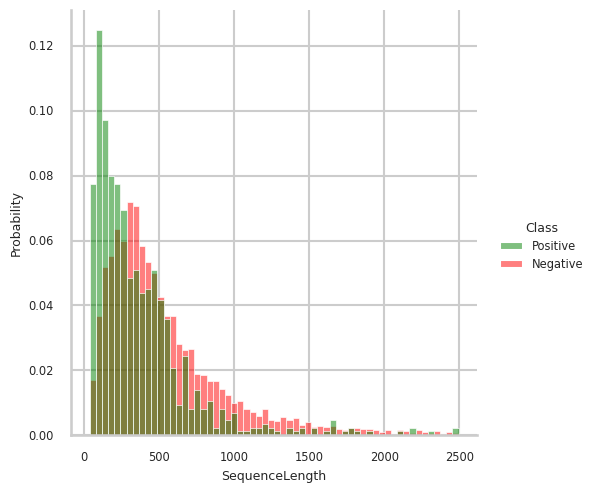

In [68]:
sns.displot(
    
     data = df_train[df_train["SequenceLength"]<=2500],
     x = "SequenceLength",
     hue = "Class",
     common_norm = False,
     stat = "probability",
   
    )

In [69]:
# We decided to focus on sequences up to a length of 2500 residues to improve the readability of the plot. 
# Our goal is to compare the length distribution between positive and negative sequences of the Training Set. 
# As we can see, sequences longer than 2500 residues are very few and mostly belong to the positive class, which means they do not 
# provide useful information for the comparison.

df_train.loc[(df_train["SequenceLength"] > 2500) & (df_train["Class"] == "Positive")]

,SequenceLength,Class,Set
2014,2813,Positive,1
2063,2530,Positive,1
2121,3351,Positive,1
2163,3083,Positive,1
2166,3380,Positive,1
2206,2586,Positive,2
2288,3330,Positive,2
2392,3396,Positive,3
2857,2692,Positive,5


In [70]:
df_train.loc[(df_train["SequenceLength"] > 2500) & (df_train["Class"] == "Negative")]

,SequenceLength,Class,Set
2962,2843,Negative,1
2981,3418,Negative,1
3032,2603,Negative,1
3104,2567,Negative,1
3222,2715,Negative,1
...,...,...,...
9419,4226,Negative,5
9519,3433,Negative,5
9534,2856,Negative,5
9655,8797,Negative,5


### Protein Sequence Lengths in Benchmark Set: Positive vs. Negative

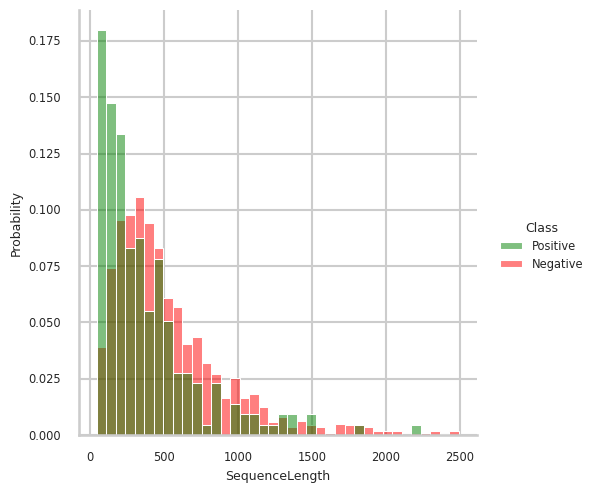

In [71]:
sns.displot(
    
     data = df_bench[df_bench["SequenceLength"]<=2500],
     x = "SequenceLength",
     hue = "Class",
     common_norm = False,
     stat = "probability"
    
    )

In [72]:
# We decided to focus on sequences up to a length of 2500 residues to improve the readability of the plot. 
# Our goal is to compare the length distribution between positive and negative sequences of the Benchmark Set. 
# As we can see, sequences longer than 2500 residues are very few and mostly belong to the positive class, which means 
# they do not provide useful information for the comparison.

df_bench.loc[df_bench["SequenceLength"] > 2500]

,SequenceLength,Class,Set
16,5263,Positive,Benchmark
52,2898,Positive,Benchmark
264,3046,Negative,Benchmark
387,3122,Negative,Benchmark
627,2531,Negative,Benchmark
927,2684,Negative,Benchmark
1117,2752,Negative,Benchmark
1172,2618,Negative,Benchmark
1348,6548,Negative,Benchmark
1358,4062,Negative,Benchmark


## Comparison of Signal Peptide (SP) Lengths

In [73]:
# Create DataFrames to compare SP lengths in positive proteins between the training set and the benchmark set.

df_SP_length = df[["SequenceLength","Class","Set","SPEnd"]]

SP_dataset = []


for _, row in df_SP_length.iterrows():
    if pd.notna(row["SPEnd"]):
        SP_dataset.append(row)
        
    else:
        continue
    
        
        
df_SP_dataset = pd.DataFrame(SP_dataset)

In [74]:
df_SP_dataset["SPEnd"].dtype

dtype('float64')

In [75]:
df_SP_dataset

,SequenceLength,Class,Set,SPEnd
1787,311,Positive,Benchmark,32.0
1788,136,Positive,Benchmark,24.0
1789,150,Positive,Benchmark,20.0
1790,161,Positive,Benchmark,20.0
1791,69,Positive,Benchmark,23.0
...,...,...,...,...
2875,152,Positive,5,30.0
2876,539,Positive,5,28.0
2877,70,Positive,5,23.0
2878,1257,Positive,5,19.0


In [76]:
# Replace numeric subset values in the "Set" column with "Training" for proteins belonging to the training set

df_SP_dataset.loc[df_SP_dataset["Set"] != "Benchmark", "Set"] = "Training"

In [77]:
df_SP_dataset["Set"].unique()

array(['Benchmark', 'Training'], dtype=object)

In [78]:
df_SP_dataset

,SequenceLength,Class,Set,SPEnd
1787,311,Positive,Benchmark,32.0
1788,136,Positive,Benchmark,24.0
1789,150,Positive,Benchmark,20.0
1790,161,Positive,Benchmark,20.0
1791,69,Positive,Benchmark,23.0
...,...,...,...,...
2875,152,Positive,Training,30.0
2876,539,Positive,Training,28.0
2877,70,Positive,Training,23.0
2878,1257,Positive,Training,19.0


In [79]:
sns.set_theme()
sns.set_theme(
     context='talk',
     style='whitegrid',
     palette=["lightblue","magenta"],
     font='sans-serif',
     font_scale=0.5,
     color_codes=True
    )

### Signal Peptide (SP) Lengths in Training vs. Benchmark Sets

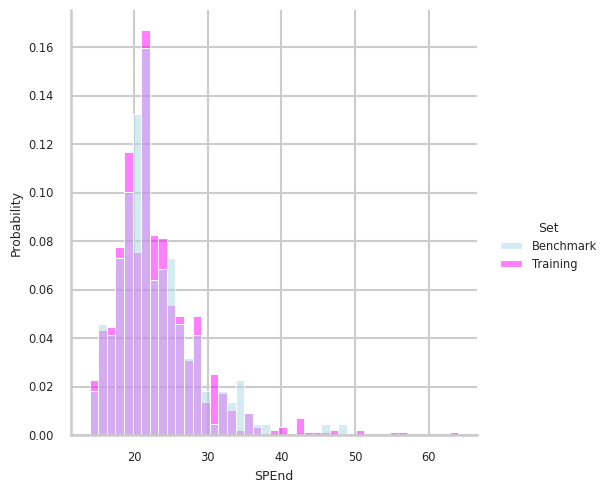

In [80]:
sns.displot(
    
     data = df_SP_dataset,
     x = "SPEnd",
     hue = "Set",
     common_norm = False,
     stat = "probability"
    
    )